# Movies - LightGBM

In [1]:
# LightGBM
import lightgbm as lgb

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import re

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_parquet("../data/movies-clean.parquet.gzip")
df.head()

,RATING,VOTES,RunTime,TYPE,Year_From,Year_To,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Biography,...,Director_Àlex Pastor,Director_Álex de la Iglesia,Director_Álvaro Brechner,Director_Álvaro Fernández Armero,Director_Álvaro Longoria,Director_Ángel Gómez Hernández,Director_Ángeles Reiné,Director_Åke Sandgren,Director_Óscar Pedraza,Director_Ömer Ugur
0,6.1,21062,121.0,Movie,2021,2021,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,17870,25.0,Series,2021,2021,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,8.2,885805,44.0,Series,2010,2022,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9.2,414849,23.0,Series,2013,2013,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
5,7.6,25858,50.0,Series,2020,2020,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [4]:
df.dtypes

RATING                       float64
VOTES                          int64
RunTime                      float64
TYPE                          object
Year_From                     object
                              ...   
Director_ngelGmezHernndez      int64
Director_ngelesRein            int64
Director_keSandgren            int64
Director_scarPedraza           int64
Director_merUgur               int64
Length: 21441, dtype: object

In [5]:
df = df.astype({"TYPE": "category", "Year_From": int, "Year_To": int})
df.dtypes

RATING                        float64
VOTES                           int64
RunTime                       float64
TYPE                         category
Year_From                       int32
                               ...   
Director_ngelGmezHernndez       int64
Director_ngelesRein             int64
Director_keSandgren             int64
Director_scarPedraza            int64
Director_merUgur                int64
Length: 21441, dtype: object

In [6]:
X = df.drop(columns=['RATING'])
y = df["RATING"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(f"Train Shape: {X_train.shape}")
print(f"Test Shape: {X_test.shape}")

Train Shape: (6534, 21440)
Test Shape: (1634, 21440)


In [18]:
model = lgb.LGBMRegressor(n_jobs=-1, importance_type="gain", n_estimators=1000)
model.fit(X_train, y_train)

LGBMRegressor(importance_type='gain', n_estimators=1000)

In [19]:
y_pred = model.predict(X_train)

mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred, squared=True)
rmse = mean_squared_error(y_train, y_pred, squared=False)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MSE: {mse}")

MAE: 0.3022958902286005
RMSE: 0.4186132156964089
MSE: 0.17523702435568816


In [20]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred, squared=True)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MSE: {mse}")

MAE: 0.6316704264160068
RMSE: 0.8697599133483042
MSE: 0.7564823068676495


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

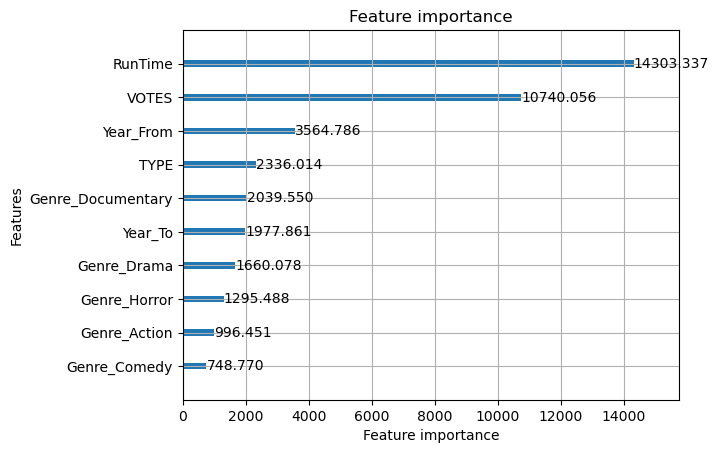

In [21]:
lgb.plot_importance(model, max_num_features=10)

<Axes: >

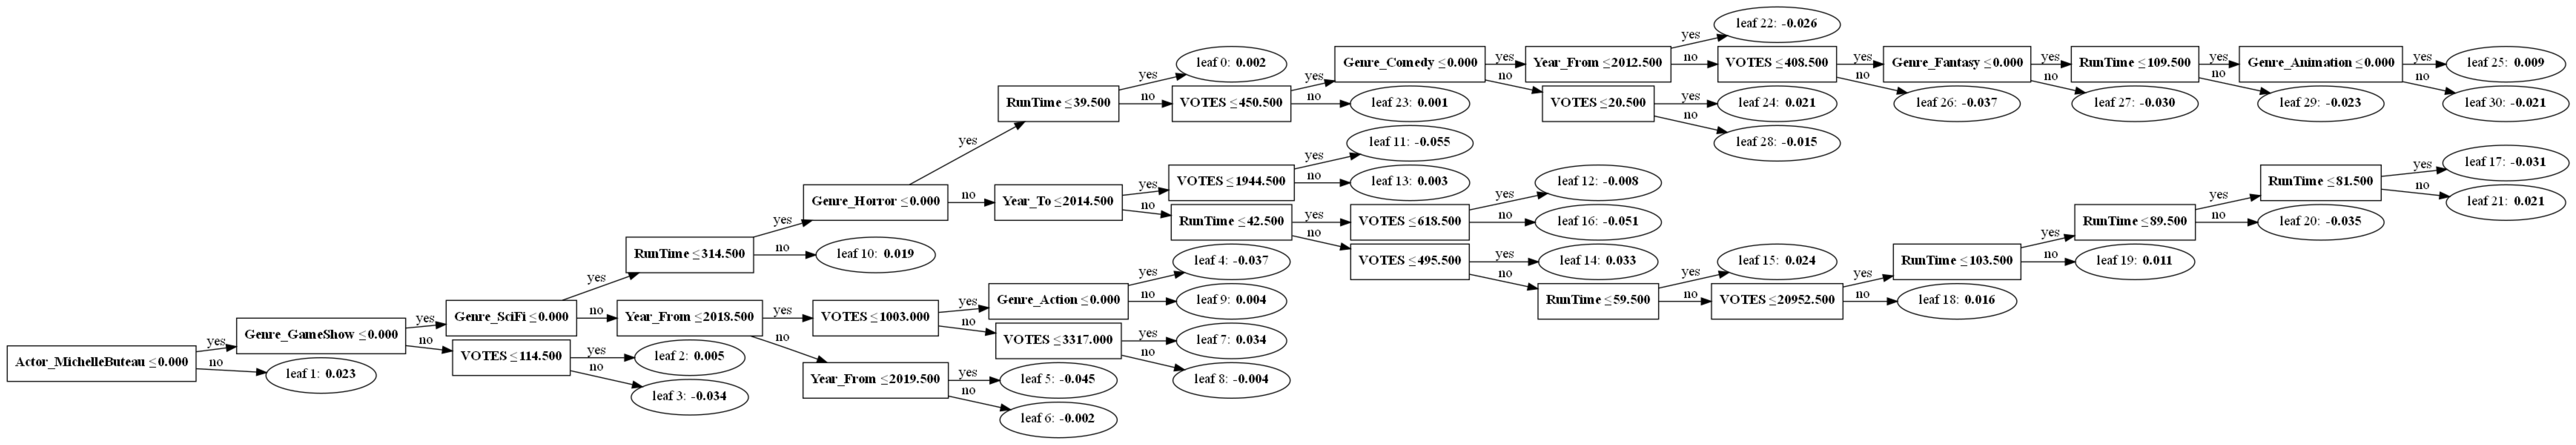

In [22]:
lgb.plot_tree(model, tree_index=50,figsize=(100, 100))